## Chapter 6 - Problem 10
***

**10.** We have seen that as the number of features used in a model increases,
the training error will necessarily decrease, but the test error may not.
We will now explore this in a simulated data set.

**A.** Generate a data set with p = 20 features, n = 1,000 observations, and an associated quantitative response vector generated
according to the model:
$$Y = Xβ + \epsilon$$ <br>
where β has some elements that are exactly equal to zero.

In [9]:
?seq

In [17]:
set.seed(100)
nfeatures <- 20
means <- sample(1:30,nfeatures,replace = TRUE)
sd <- sample(1:30,nfeatures,replace = TRUE)

X <- matrix(data = NA,nrow = 1000, ncol = nfeatures)

for (i in 1:nfeatures){
    X[,i] <- rnorm(1000,mean = means[i],sd = sd[i])
}

Beta = sample(seq(0,100,by = 0.1),20)
Beta = ifelse(Beta <30,0,Beta)

eps = rnorm(1000)
Y = X%*%Beta+eps

10771.901
5541.870
16904.471
4230.837
12599.444
12428.718
10507.203
13557.853
9757.037
2857.133
8052.281


**B.** Split your data set into a training set containing 100 observations
and a test set containing 900 observations.

In [48]:
train = sample(1:1000,100,replace = FALSE)
test = seq(1,1000)[-train]

**C.** Perform best subset selection on the training set, and plot the
training set MSE associated with the best model of each size.

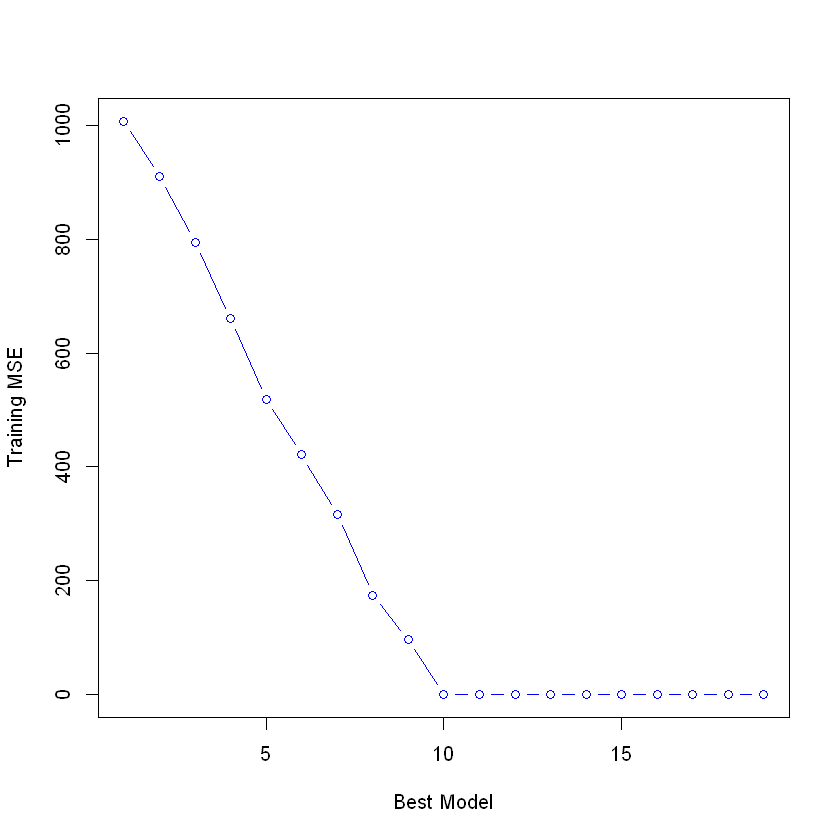

In [54]:
library(leaps)
dataset = data.frame(Y = Y,X=X)
regfit.best <- regsubsets(Y~.,data = dataset[train,],nvmax = 20)
regfit.best.summary <- summary(regfit.best)
plot(sqrt(regfit.best.summary$rss[-1]/1000),xlab = "Best Model",ylab = "Training MSE",
    type = "b",col = "blue")

**D.** Plot the test set MSE associated with the best model of each
size.

,(Intercept),X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,...,X.11,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20
1,1,2.552470,8.860754,1.4030171,-1.5183752,8.8831948,5.319919,3.336201,1.636136,14.47842912,...,3.891188,21.473906,2.9108840,-0.06848861,17.784834,27.9017640,12.0437545,-24.1519093,48.660886,27.05834
2,1,22.989030,9.376877,-11.6596773,2.2415401,8.7260974,20.987694,30.874382,32.956293,11.90829349,...,22.026865,-28.288675,1.6639705,-24.99625642,-8.354774,-14.3869328,7.8289427,13.8067572,43.286827,28.97631
3,1,14.453342,20.238842,34.9058599,16.3418401,19.1413228,19.806400,25.542586,15.507146,25.67404232,...,7.836583,33.870601,18.5853959,45.47678347,7.801764,84.6787432,5.2352575,39.3096170,-2.022405,18.82280
4,1,23.147878,5.420690,13.6765457,-41.1308898,12.1499339,19.920629,-19.109427,-6.470303,3.82462550,...,17.281393,66.072854,13.8899393,74.72720275,48.986333,-2.8532373,13.9162870,10.9954830,6.171375,20.41082
5,1,-3.844445,-4.583549,13.1817407,-3.6984167,29.7483028,14.443237,25.383230,-8.376505,33.90471973,...,21.227464,-10.920282,1.8207764,-36.91128389,-3.357986,21.1256149,11.7982135,-4.6525737,83.196246,17.02857
6,1,2.546340,14.016597,15.9081031,23.2065989,24.1006018,13.126489,26.095467,-25.186018,-1.40212457,...,-6.619532,19.572524,2.8476994,53.73962039,20.468095,30.0236846,1.4596973,18.4227548,25.444813,16.14007
7,1,-2.243766,-10.418394,21.0511949,0.1317023,8.8942529,26.634185,24.491484,2.087520,48.57144462,...,8.065133,-19.514183,13.4907852,-14.73838767,58.802082,65.1235204,3.2619001,-5.2139113,24.544257,21.54335
8,1,13.926057,4.405161,6.4692142,31.8640281,16.2384470,10.917096,53.856110,-4.834474,23.31010932,...,12.875344,22.768525,-5.2021308,14.11097957,53.022457,62.5254000,5.2379047,35.4082020,-54.051223,20.27377
9,1,-9.681401,19.636216,15.2490505,-17.8727475,28.1712202,14.705525,6.870128,23.621530,0.09507741,...,3.924176,53.360091,18.7374205,5.22004033,1.028448,-2.6779843,8.9689605,-11.5006762,24.845656,15.74077
10,1,14.200292,-3.076467,21.9618624,-6.6335793,20.9366268,15.720056,9.586219,32.038350,1.05086816,...,33.903902,24.616881,13.4289574,15.09498176,-1.744940,-56.5578027,1.9212503,51.4035602,-4.736813,14.57987


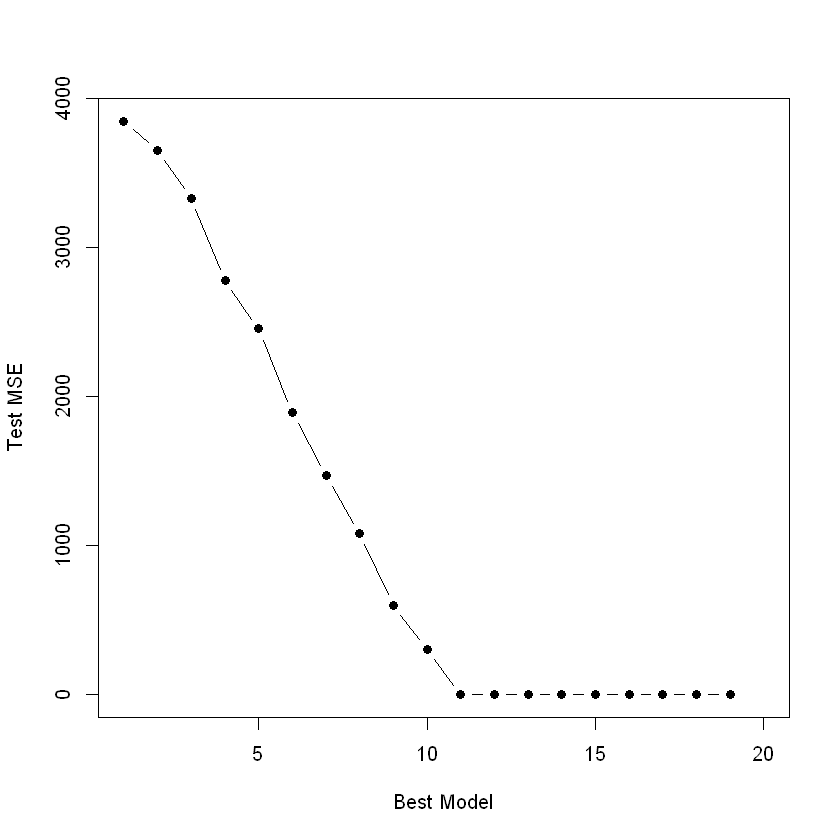

In [70]:
val.errors <- rep(NA,20)
x.test <- model.matrix(Y~., data=dataset[test,])

for (i in 1:20){
    coef = coef(regfit.best,i)
    pred = x.test[,names(coef)]%*%coef 
    val.errors[i] = mean((pred-Y[test])^2)
}

plot(sqrt(val.errors),xlab = "Best Model",ylab = "Test MSE",
    type = "b",col = "black",pch = 19)


**E.** For which model size does the test set MSE take on its minimum
value? Comment on your results.

In [72]:
best.model = which.min(val.errors)
best.model
coef(regfit.best,best.model)

[1] 11

(Intercept)         X.2         X.3         X.4         X.5         X.7 
  -1.151935   67.200282   46.001804   82.798585   64.982597   63.605128 
        X.9        X.10        X.12        X.16        X.19        X.20 
  86.204931   54.112520   74.402384   42.498851   47.797002   75.341870

[1]  0.0 67.2 46.0 82.8 65.0  0.0 63.6  0.0 86.2 54.1  0.0 74.4  0.0  0.0  0.0
[16] 42.5  0.0  0.0 47.8 75.3

Based on the test MSE, the best model contains 11 variables out of the original 20 predictors.

**F.** How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment
on the coefficient values.

In [83]:
best.coef <- ifelse(colnames(x.test) %in% names(coef(regfit.best,best.model)),coef(regfit.best,best.model),0)
cbind(best.coef[-1],Beta)

,Beta
0.000000,0.0
46.001804,67.2
82.798585,46.0
64.982597,82.8
63.605128,65.0
0.000000,0.0
54.112520,63.6
0.000000,0.0
42.498851,86.2
47.797002,54.1


In [79]:
As observed, the coefficients of the best model are similar to the true model.

**G.** Create a plot displaying $\sqrt{\sum _{j=1}^{p} [(\beta_j-\hat{\beta_j^R}]^2}$ for a range of values of r, where $\hat{\beta_j^R}$ is the jth coefficient estimate for the best model containing r coefficients. Comment on what you observe. How does this compare to the test MSE plot from (d)?

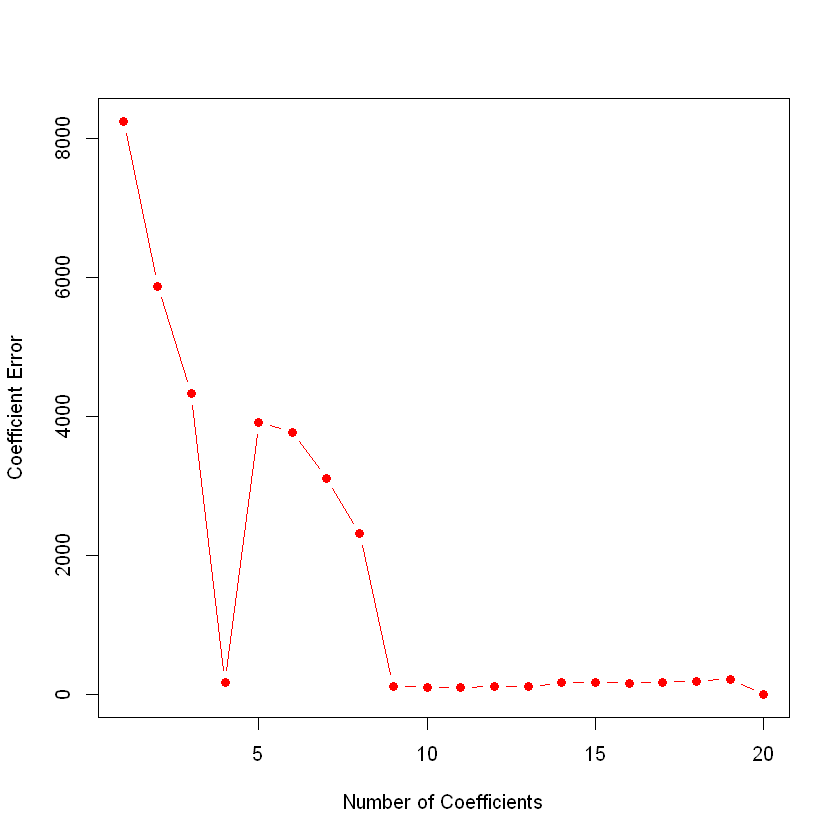

In [94]:
beta.error <- rep(NA,20)

for (i in 1:20){
    condition <- colnames(x.test) %in% names(coef(regfit.best,i))
    models.coef <- ifelse(condition,coef(regfit.best,i),0)[-1]
    beta.error[i] <- sqrt(sum((Beta-models.coef)^2))
}

plot(beta.error,type = "b", pch = 19, col = "red",xlab = "Number of Coefficients", ylab = "Coefficient Error")

The error between the estimated and true coefficient is minimized at 20, not at 11 in contrast of the Test MSE graph. The coefficient errors also show that for a number of coefficients above 9, the error does not change much.